# importing required library
also using the titanic data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv("C:/Users/PRIYA/Desktop/Examples for R algo/Logistic regression/Titanic dataset/train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Here we see there are NaN values,and we will be using heat map to see the missing values.

For that i will be using the seaborn library.

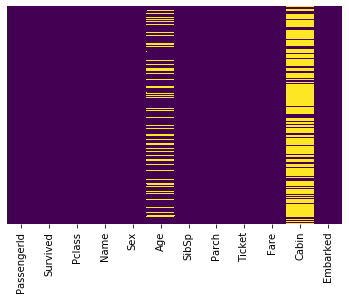

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we see missing values in age and cabin.

To fill age feature we need to see what type of people has come to the ship,we see gender parameter ,there we have male and female variables only.And we also know male has different age group and female have different age group.to replace it with the mean value we also need to consider the passenger class.what mean to be taken for the age group for that also we need to consider the pclass feature.

Now we will see the count of the male and the female that survived.

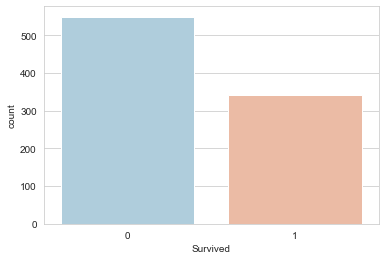

In [9]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=train,palette='RdBu_r')

Now from this we further go for category like male and the female.

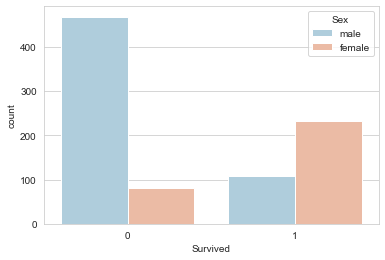

In [10]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

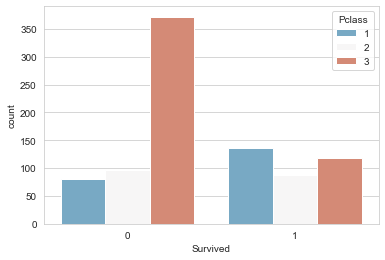

In [11]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

Checking the age distribution of the people.

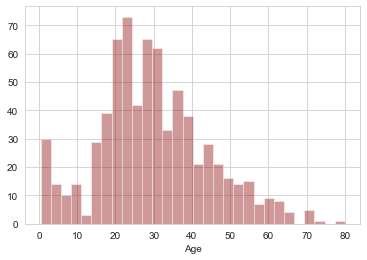

In [13]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

We see majority falls in the range of 17 to 40

kde(kernel density estimator uses dropna() function otherwise it will give error.


# So i will replacing the missing value of age with the mean of the pclass.
Here i will be using the box plot for the mean estimation.

Again we will be using the seaborn library for the box plot.

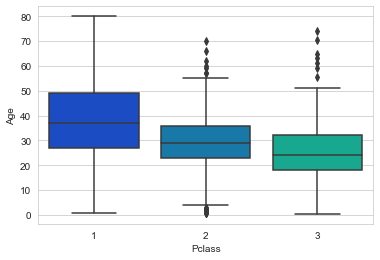

In [16]:
sns.boxplot(x="Pclass",y='Age',data=train,palette='winter')

So we can say we have median for class 1 passenger is around 37,for class 2 around 28 and for class 3 it is around 24.


So i will just apply a condition where i will just say that if the person belong to class 1 ,i will replace that age with the median of that age(37),then next condition if it belongs to class 2 then i will replace the value with the median of that class(28)and so for class 3.

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

This function basically means :
1)first i will derive the function impute_age
2)Age and Pclass are the parameters we provided
3)now the if condition,when my age is null,so i will put a condition if it belongs to Pclass to 1 it should return as 1,else if it is of class 2 ,it should return to 28 or else return to 24
4)last else, means when it satisfied all the condition and bypass the condition,the age value will remain as it is ,because it will not have any missing value. 

Applying the function 

In [19]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

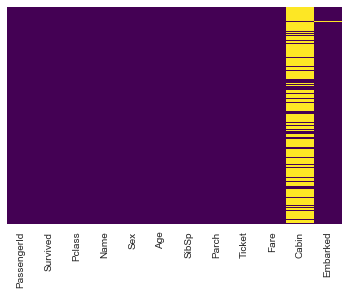

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

now i see that there are no missing values in Age feature.


# We will be removing cabin feature as it has more than 80% missing value.

# EDA with preprocessing is done.